In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import tensorflow as tf
import seaborn as sb
from sklearn.linear_model import LinearRegression

In [ ]:
dataset_cols = ["bike_count" , "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv", encoding = "iso-8859-1") # the phrase "encoding = iso-8859-1" is given bcoz the contents of the SeoulBikeData is encoded in iso-8859-1 not in UTF-8 or GPU-4
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df["Functioning Day"] = (df["Functioning Day"]=="Yes").astype(int)
df = df.drop(["Seasons", "Holiday", "Date"], axis = 1)
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Functioning Day'],
      dtype='object')

In [ ]:
df = df[df['Hour']==12]
df = df.drop(['Hour'], axis = 1)

In [ ]:
df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


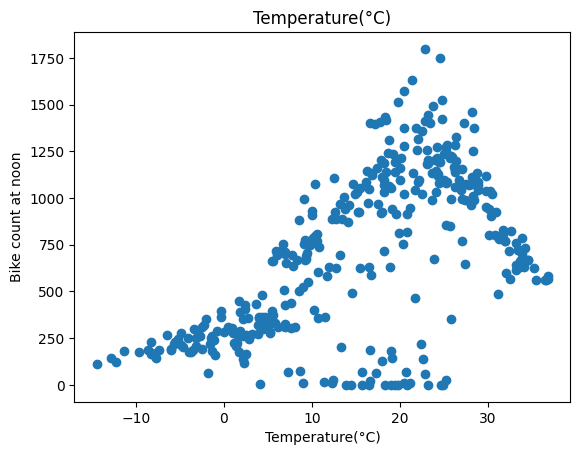

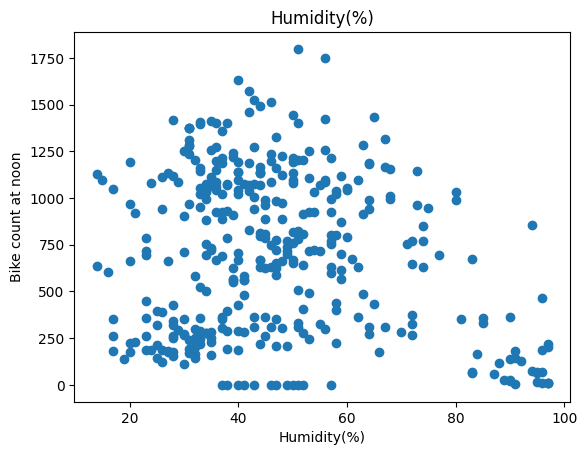

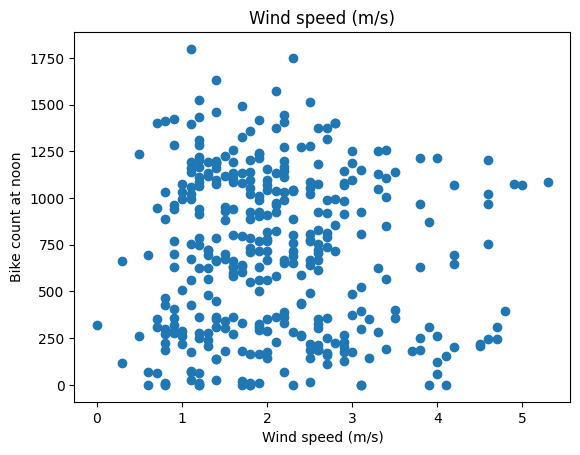

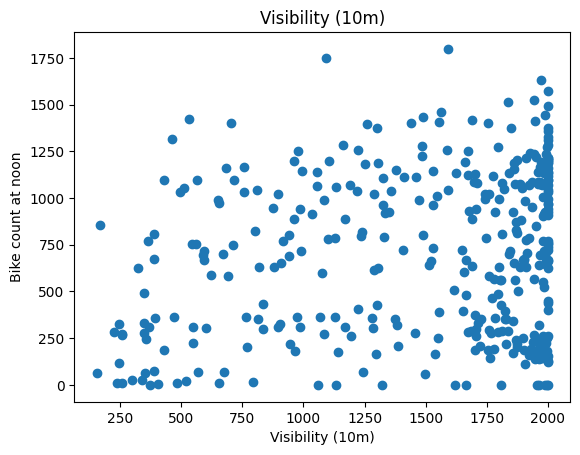

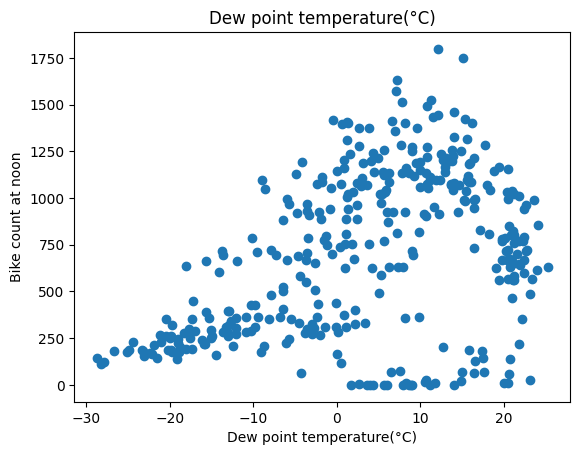

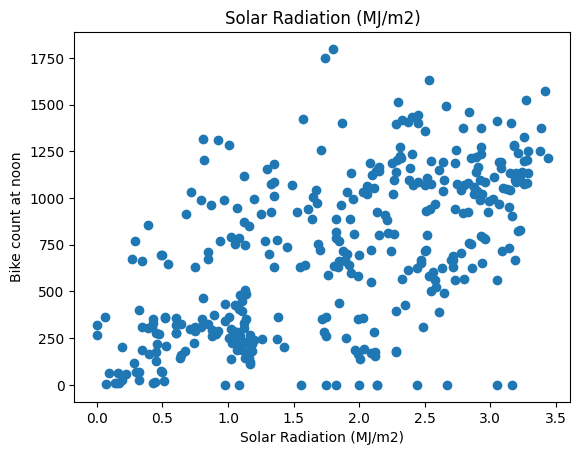

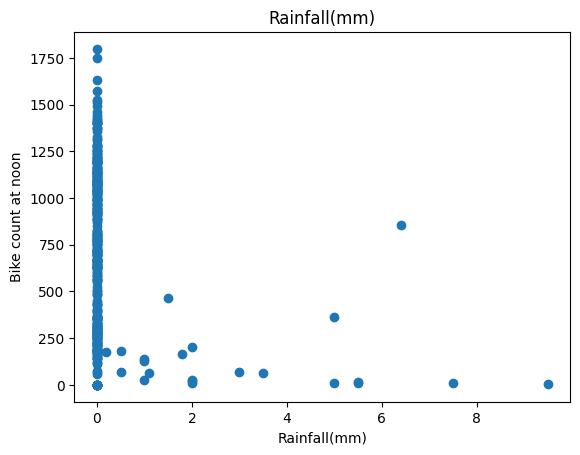

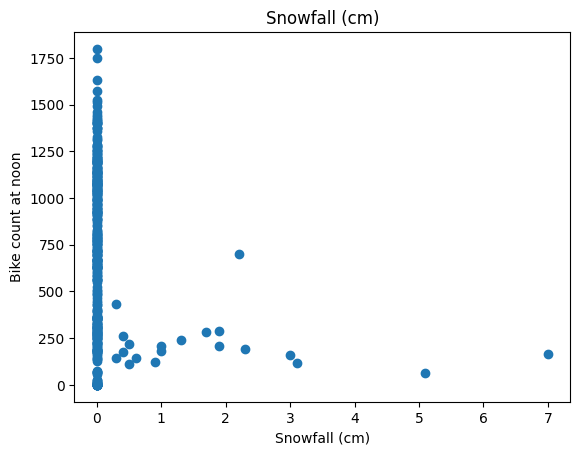

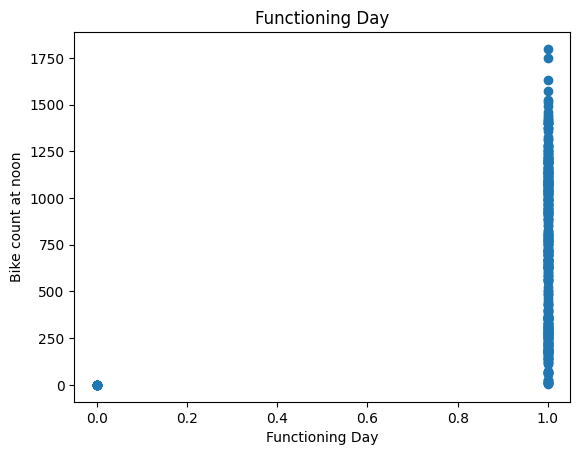

In [ ]:
for i in df.columns[1:] :
  plt.scatter(df[i], df["Rented Bike Count"])
  plt.title(i)
  plt.ylabel("Bike count at noon")
  plt.xlabel(i)
  plt.show()

In [ ]:
df = df.drop(["Wind speed (m/s)", "Visibility (10m)", "Functioning Day"], axis=1)
df .head()

,Rented Bike Count,Temperature(°C),Humidity(%),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [ ]:
df.rename(columns= {"Rented Bike Count": "bike count", "Temperature(°C)":"temp", "Humidity(%)":"humidity", "Dew point temperature(°C)":"dew_pt_temp", "Solar Radiation (MJ/m2)":"radiation", "Rainfall(mm)":"rain", "Snowfall (cm)" :"snow"}, inplace = True)
df.head()

,bike count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# ***Train***, ***Valid***, ***Test***

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
# df.sample(frac=1) = this shuffles the entire dataframe ,first 60% for the training and next 20% for the valid set, remaining 20% for test

In [ ]:
def get_xy(dataframe,y_label,x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values()
    else:
        if len(x_labels)==1:
           X = dataframe[x_labels[0]].values.reshape(-1,1)
        else:
           X = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((X,y))

    return data, X, y

In [ ]:
_, x_train_temp, y_train_temp = get_xy(train, "bike count", x_labels=["temp"])
_, x_valid_temp, y_valid_temp = get_xy(valid, "bike count", x_labels=["temp"])
_, x_test_temp, y_test_temp = get_xy(test, "bike count", x_labels=["temp"])

In [ ]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp, y_train_temp)

LinearRegression()

In [ ]:
print(temp_reg.coef_, temp_reg.intercept_)

[[22.04702502]] [380.23068462]


In [ ]:
temp_reg.score(x_test_temp, y_test_temp) # score refers to the "r square score" of the training data
                                         # tells how the model prediction match the actual value

0.23762727441697085

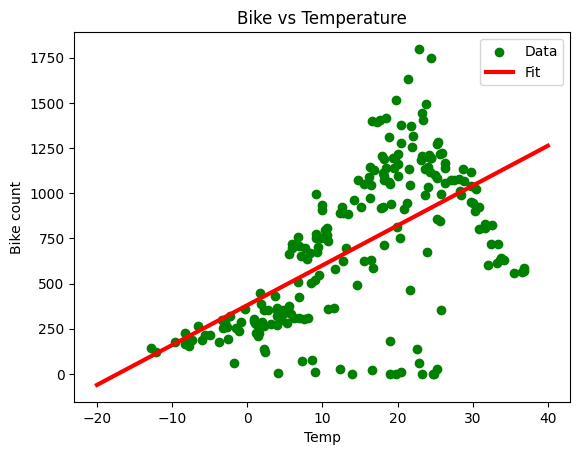

In [ ]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="green")
x = tf.linspace(-20,40,100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label="Fit", color="red",linewidth=3)
plt.legend()
plt.title("Bike vs Temperature")
plt.xlabel("Temp")
plt.ylabel("Bike count")
plt.show()

# ***MULTIPLE*** ***LINEAR*** ***REGRESSION***

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, x_train_all, y_train_all = get_xy(train, "bike count", x_labels=df.columns[1:])
_, x_valid_all, y_valid_all = get_xy(valid, "bike count", x_labels=df.columns[1:])
_, x_test_all, y_test_all = get_xy(test, "bike count", x_labels=df.columns[1:])


In [ ]:
all_reg = LinearRegression()
all_reg.fit(x_train_all, y_train_all)

LinearRegression()

In [ ]:
all_reg.score(x_test_all, y_test_all)

0.49012018257816004

# **REGRESSION WITH NEURAL NET**



In [ ]:
def plot_loss(history):
  plt.plot(history.history["loss"], label = "loss")
  plt.plot(history.history["val_loss"], label = "val_loss")
  plt.xlabel("Epoch")
  plt.ylabel("MSE")
  plt.legend()
  plt.grid(True)
  plt.show()


In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis = None)
temp_normalizer.adapt(x_train_temp.reshape(-1,1))

In [ ]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [ ]:
temp_nn_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01), loss = "mean_squared_error")

In [ ]:
history = temp_nn_model.fit(
        x_train_temp.reshape(-1), y_train_temp,
        verbose=0,
        epochs=1000,
        validation_data=(x_valid_temp,y_valid_temp)
)

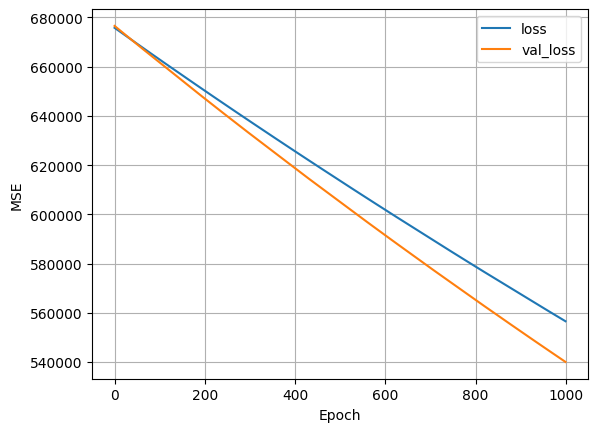

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


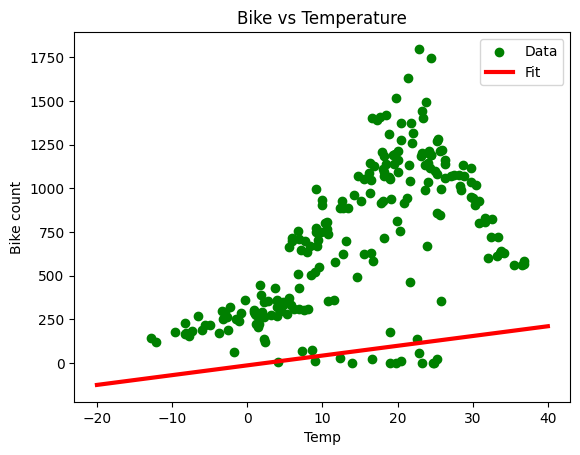

In [ ]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="green")
x = tf.linspace(-20,40,100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red",linewidth=3)
plt.legend()
plt.title("Bike vs Temperature")
plt.xlabel("Temp")
plt.ylabel("Bike count")
plt.show()

***NEURAL*** ***NET***

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis = None)
temp_normalizer.adapt(x_train_temp.reshape(-1,1))
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(32, activation = "relu"), # this line is added again to get the model prediction even more better
    tf.keras.layers.Dense(1) # here the "relu" is reduced
])

In [ ]:
nn_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss = "mean_squared_error")

In [ ]:
history = nn_model.fit(
        x_train_temp, y_train_temp,
        verbose=0,
        epochs=100,
        validation_data=(x_valid_temp,y_valid_temp)
)

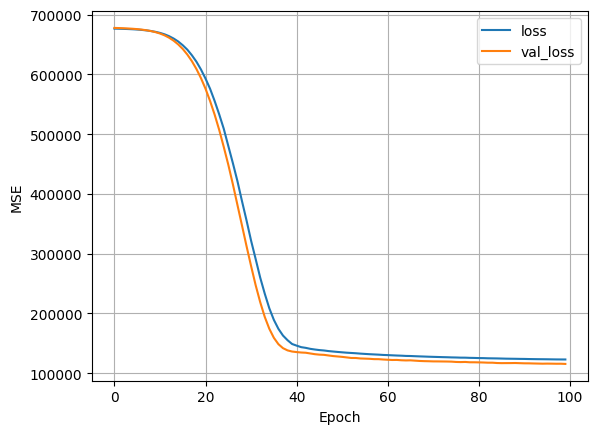

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


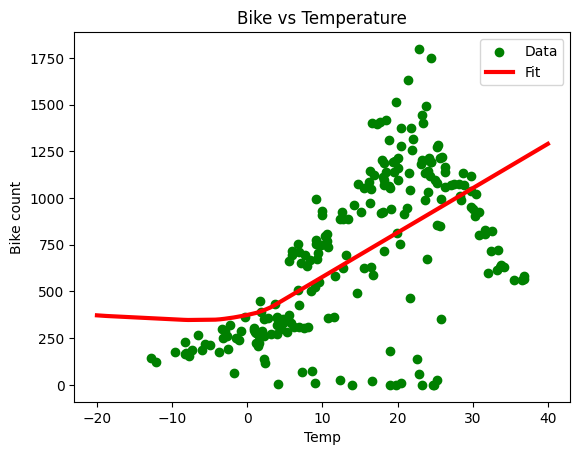

In [ ]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="green")
x = tf.linspace(-20,40,100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red",linewidth=3)
plt.legend()
plt.title("Bike vs Temperature")
plt.xlabel("Temp")
plt.ylabel("Bike count")
plt.show()

In [ ]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis = -1)
all_normalizer.adapt(x_train_temp.reshape(-1,1))

In [ ]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(1)
])

nn_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss = "mean_squared_error")

In [ ]:
history = nn_model.fit(
    x_train_all, y_train_all,
    verbose = 0,
    epochs = 100,
    validation_data = (x_valid_all, y_valid_all)
)

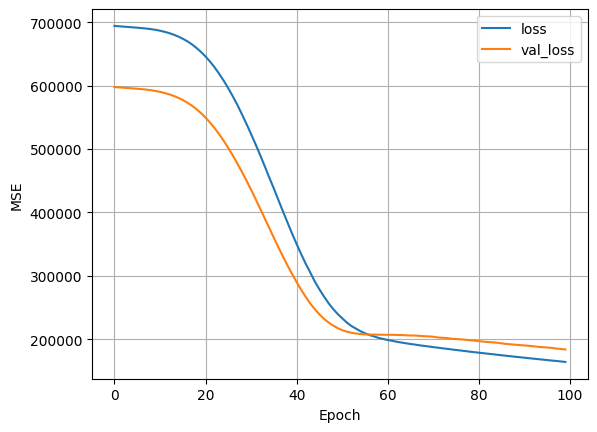

In [ ]:
plot_loss(history)

In [ ]:
# Comparing the MSE (Mean Squared Error) b/w linear regression and Neural net model
y_pred_lr= all_reg.predict(x_test_all) # lr i.e. linear regression
y_pred_nn = nn_model.predict(x_test_all)

3/3 [==============================] - 0s 4ms/step


In [ ]:
def MSE(y_pred, y_real):
  return(np.square(y_pred-y_real)).mean()

In [ ]:
MSE(y_pred_lr, y_test_all)  # MSE for Linear regressor

100743.83455211873

In [ ]:
MSE(y_pred_nn, y_test_all)  # MSE for Neural Net Model

178763.84328099256

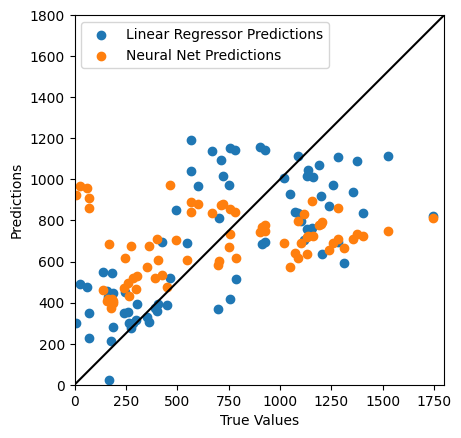

In [ ]:
ax = plt.axes(aspect = "equal")
plt.scatter(y_test_all, y_pred_lr, label= "Linear Regressor Predictions")
plt.scatter(y_test_all, y_pred_nn, label= "Neural Net Predictions")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims =[0,1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_= plt.plot(lims, lims, color="black")